# 0.0 Imports

In [1]:
import numpy  as np
import pandas as pd

import seaborn           as sns
import matplotlib.pyplot as plt

from IPython.core.display import HTML
from IPython.display      import Image

## 0.1 Helper Functions

In [2]:
def personal_settings():
    
    # notebook settings
    display(HTML('<style>.container{width:98% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.options.display.float_format = '{:.2f}'.format
    
    return None

In [3]:
personal_settings()

## 0.2 Loading Data

In [4]:
directory = 'datasets/olist/' 

orders              = pd.read_csv(directory + 'olist_orders_dataset.csv')
order_items         = pd.read_csv(directory + 'olist_order_items_dataset.csv')
order_payments      = pd.read_csv(directory + 'olist_order_payments_dataset.csv')
order_reviews       = pd.read_csv(directory + 'olist_order_reviews_dataset.csv')
customer            = pd.read_csv(directory + 'olist_customers_dataset.csv')
products            = pd.read_csv(directory + 'olist_products_dataset.csv')
product_translation = pd.read_csv(directory + 'product_category_name_translation.csv')
sellers             = pd.read_csv(directory + 'olist_sellers_dataset.csv')

In [5]:
# merge all datasets that related to the customer
m1 = pd.merge(orders, order_reviews, on='order_id')
m2 = pd.merge(m1, order_payments, on='order_id') 
customer = pd.merge(m2, customer, on='customer_id')

In [6]:
# merge all datasets related to the seller  
m1 = pd.merge(order_items, products, on='product_id')
m2 = pd.merge(m1, sellers, on='seller_id')
seller = pd.merge(m2, product_translation, on='product_category_name')

In [7]:
# merge customer and seller datasets
df_raw = pd.merge(customer, seller, on ='order_id')

# 1.0 Data Description


In [8]:
df_raw.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english'],
      dtype='object')

In [9]:
# selecting only columns that make sense for our analysis
df1 = df_raw[['order_status','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date', 'shipping_limit_date', 
              'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'price', 'freight_value','product_category_name_english', 
              'product_name_lenght', 'product_description_lenght', 'product_photos_qty','review_score']].copy()

## 1.1 Rename Columns

In [10]:
df1 = df1.rename(columns={'product_category_name_english': 'product_category'})

## 1.2 Data Dimensions

In [11]:
print(df1.shape[0], 'rows')
print(df1.shape[1], 'columns')

115609 rows
16 columns


## 1.3 Data Types

In [12]:
description = []
for i in df1.columns:
    description.append([
        i,
        df1[i].dtypes,
        df1[i].nunique(),
        df1[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data=description, columns=['attributes','dtypes', 'nunique','sample'])

,attributes,dtypes,nunique,sample
0,order_status,object,7,"[unavailable, delivered]"
1,order_purchase_timestamp,object,95989,"[2017-04-09 11:42:18, 2017-11-22 16:48:43]"
2,order_delivered_customer_date,object,93702,"[2018-06-25 20:34:28, 2017-03-06 09:58:12]"
3,order_estimated_delivery_date,object,449,"[2018-07-25 00:00:00, 2018-01-17 00:00:00]"
4,shipping_limit_date,object,91386,"[2017-10-26 03:05:55, 2017-07-03 23:35:09]"
5,payment_sequential,int64,29,"[26, 7]"
6,payment_type,object,4,"[boleto, debit_card]"
7,payment_installments,int64,24,"[9, 0]"
8,payment_value,float64,28657,"[189.53, 1075.83]"
9,price,float64,5879,"[149.49, 65.85]"


## 1.4 Check NA

In [13]:
description = []
for i in df1.columns:
    description.append([
        i,
        df1[i].isna().sum(),
        round((df1[i].isna().sum()/len(df1))*100)
    ])

pd.DataFrame(data=description, columns=['attributes','null', '%null'])

,attributes,null,%null
0,order_status,0,0
1,order_purchase_timestamp,0,0
2,order_delivered_customer_date,2400,2
3,order_estimated_delivery_date,0,0
4,shipping_limit_date,0,0
5,payment_sequential,0,0
6,payment_type,0,0
7,payment_installments,0,0
8,payment_value,0,0
9,price,0,0


The null rows represent only 2% of the dataset. Removing these rows will not have much impact on the analysis. 

## 1.5 NA Remover

In [14]:
df1.dropna(how='any', inplace=True)

print(df1.shape[0], 'rows')
print(df1.shape[1], 'columns')

113209 rows
16 columns


## 1.6 Change Data Types

In [15]:
cols = ['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'shipping_limit_date']
for col in cols:
    df1[col] = pd.to_datetime(df1[col]).dt.date
    
df1[['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'shipping_limit_date']].head()

,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,shipping_limit_date
0,2017-10-02,2017-10-18,2017-10-10,2017-10-06
1,2017-10-02,2017-10-18,2017-10-10,2017-10-06
2,2017-10-02,2017-10-18,2017-10-10,2017-10-06
3,2018-07-24,2018-08-13,2018-08-07,2018-07-30
4,2018-08-08,2018-09-04,2018-08-17,2018-08-13


## 1.7 Descriptive Statistical

In [16]:
qnt1_attributes = df1[['payment_installments', 'payment_value', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']]

cat1_attributes = df1[['order_status', 'order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date', 'shipping_limit_date', 
                       'payment_sequential', 'payment_type', 'product_category','review_score']]

### 1.7.1 Quantitative Attributes

In [17]:
## count, mean, std, min, quartile 1 (25%), quartile 2(50%), quartile 3 (75%) and max
qnt1_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_installments,113209.00,2.94,2.78,0.00,1.00,2.00,4.00,24.00
payment_value,113209.00,171.57,264.24,0.00,60.85,107.98,189.15,13664.08
price,113209.00,119.86,181.15,0.85,39.90,74.90,133.00,6735.00
freight_value,113209.00,20.00,15.71,0.00,13.08,16.32,21.19,409.68
product_name_lenght,113209.00,48.80,10.02,5.00,42.00,52.00,57.00,76.00
product_description_lenght,113209.00,784.73,650.30,4.00,346.00,600.00,982.00,3992.00
product_photos_qty,113209.00,2.21,1.72,1.00,1.00,1.00,3.00,20.00


### 1.7.2 Categorical Attributes

In [18]:
cat1_summary = cat1_attributes.astype('category').describe().T
cat1_summary 

,count,unique,top,freq
order_status,113209,2,delivered,113202
order_purchase_timestamp,113209,611,2017-11-24,1379
order_delivered_customer_date,113209,642,2018-05-21,523
order_estimated_delivery_date,113209,444,2017-12-20,640
shipping_limit_date,113209,550,2017-11-30,1680
payment_sequential,113209,26,1,108370
payment_type,113209,4,credit_card,83536
product_category,113209,71,bed_bath_table,11685
review_score,113209,5,5,65154


# 2.0 Feature Engineering for Analysis

In [19]:
df2 = df1.copy()

## 2.1 Mind Map

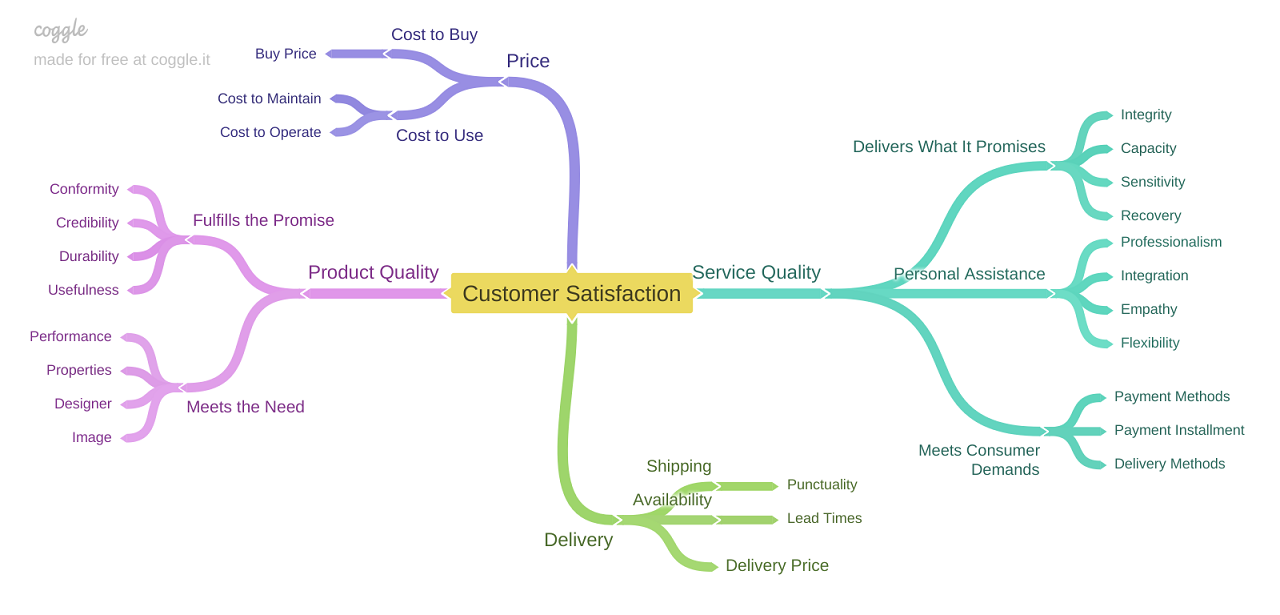

In [21]:
Image('images/mind_map.png')

## 2.2 Hypotesis List

## 2.3 Features Creation